In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  confusion_matrix
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [ ]:
df=pd.read_excel('/content/Grade Prediction Data (Responses).xlsx')
df

,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10),Final Grade (last Semester - 3-2) (GPA)
0,1,8,65,12,6,8.0,3,1,NaN,3,3.25
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14
...,...,...,...,...,...,...,...,...,...,...,...
83,2,12,99,8,8,7.0,2,1,6.0,6,3.78
84,2,12,70,12,8,8.0,4,1,7.0,8,3.48
85,1,12,80,8,6,6.0,4,2,7.0,7,3.76
86,2,12,90,4,7,7.0,2,1,3.0,3,3.76


In [ ]:
df.isnull().sum()

Daily Study Hour (0 - )                      0
Average CT Marks (0 - 20)                    0
Class Attendance (percentage)                0
PL/SPL Study Hours (Daily) (0 - )            0
PL/SPL Sleeping Hours (Daily Average)        0
Average Sleeping Hours (Daily)               0
Social Media Hours (Daily Average)           0
PL/SPL Social Media Hours (Daily Average)    0
Concentration in Classes (0 - 10)            1
Confidence (0 - 10)                          0
Final Grade (last Semester - 3-2) (GPA)      0
dtype: int64

In [ ]:
df['Concentration in Classes (0 - 10)'].fillna(4,inplace=True)
df.isnull().sum()

Daily Study Hour (0 - )                      0
Average CT Marks (0 - 20)                    0
Class Attendance (percentage)                0
PL/SPL Study Hours (Daily) (0 - )            0
PL/SPL Sleeping Hours (Daily Average)        0
Average Sleeping Hours (Daily)               0
Social Media Hours (Daily Average)           0
PL/SPL Social Media Hours (Daily Average)    0
Concentration in Classes (0 - 10)            0
Confidence (0 - 10)                          0
Final Grade (last Semester - 3-2) (GPA)      0
dtype: int64

In [ ]:
col=df.columns

In [ ]:
target=[]
def category(x):
  if(x<3.00):
    return "low"
  elif(x>3.50):
    return "high"
  else:
    return "medium"




df['target']=df['Final Grade (last Semester - 3-2) (GPA) '].apply(category)
df.head()


,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10),Final Grade (last Semester - 3-2) (GPA),target
0,1,8,65,12,6,8.0,3,1,4.0,3,3.25,medium
1,2,12,95,9,10,10.0,2,1,7.0,7,3.84,high
2,2,15,96,13,6,8.0,5,2,5.0,8,3.61,high
3,1,9,70,6,8,8.0,3,2,7.0,9,3.41,medium
4,1,8,60,10,9,8.0,2,2,3.0,4,3.14,medium


In [ ]:
X=df[col[:10]]
X

,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10)
0,1,8,65,12,6,8.0,3,1,4.0,3
1,2,12,95,9,10,10.0,2,1,7.0,7
2,2,15,96,13,6,8.0,5,2,5.0,8
3,1,9,70,6,8,8.0,3,2,7.0,9
4,1,8,60,10,9,8.0,2,2,3.0,4
...,...,...,...,...,...,...,...,...,...,...
83,2,12,99,8,8,7.0,2,1,6.0,6
84,2,12,70,12,8,8.0,4,1,7.0,8
85,1,12,80,8,6,6.0,4,2,7.0,7
86,2,12,90,4,7,7.0,2,1,3.0,3


In [ ]:
df['target'].value_counts()

high      58
medium    25
low        5
Name: target, dtype: int64

In [ ]:
Y=df['target']
Y

0     medium
1       high
2       high
3     medium
4     medium
       ...  
83      high
84    medium
85      high
86      high
87    medium
Name: target, Length: 88, dtype: object

In [ ]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Decision tree classifier 
DT = DecisionTreeClassifier(criterion='entropy')

#fitting the training data
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# # prediction on random data
# X=[[6.4,1.8 ,6.6 ,2.1]]
# Y_pred=DT.predict(X)
# print(Y_pred)

# prediction on X_test (testing data )
Y_pred=DT.predict(X_test)
print(Y_pred)

['high' 'medium' 'high' 'high' 'high' 'medium' 'medium' 'high' 'high'
 'low' 'medium' 'medium' 'high' 'high' 'high' 'high' 'high' 'low']


In [ ]:
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, Y_pred))
#confusion matrix
cm=np.array(confusion_matrix(y_test, Y_pred))
cm

Accuracy: 0.7777777777777778


array([[9, 0, 1],
       [0, 1, 0],
       [2, 1, 4]])

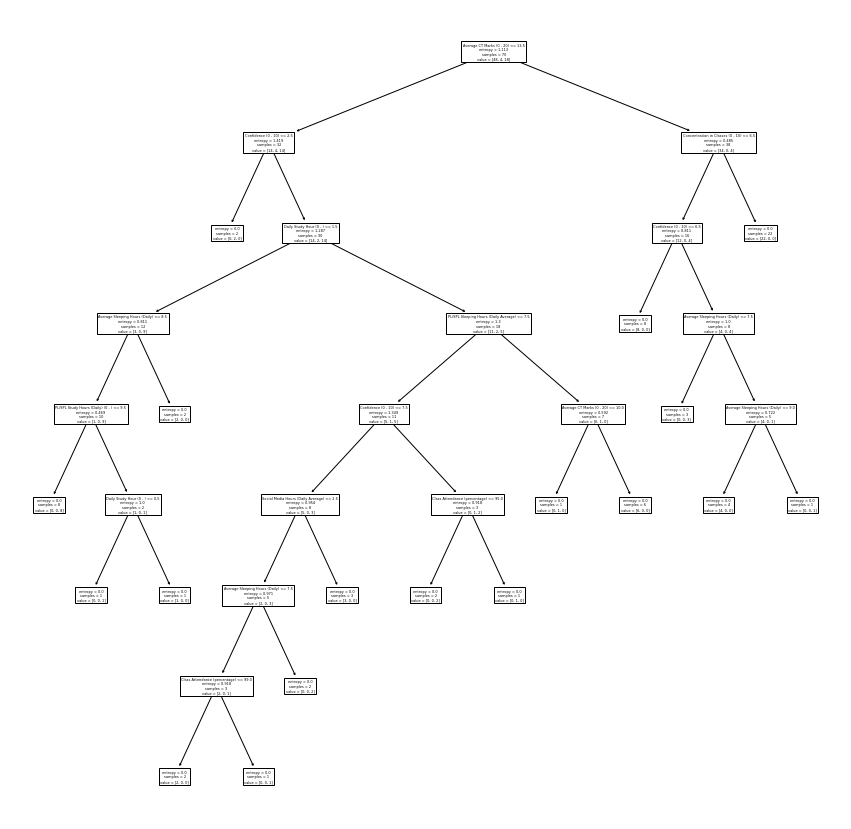

In [ ]:
#plot decision tree
fig, ax = plt.subplots(figsize=(15, 15)) #figsize value changes the size of plot
tree.plot_tree(DT,ax=ax,feature_names=col[:10])
plt.show()

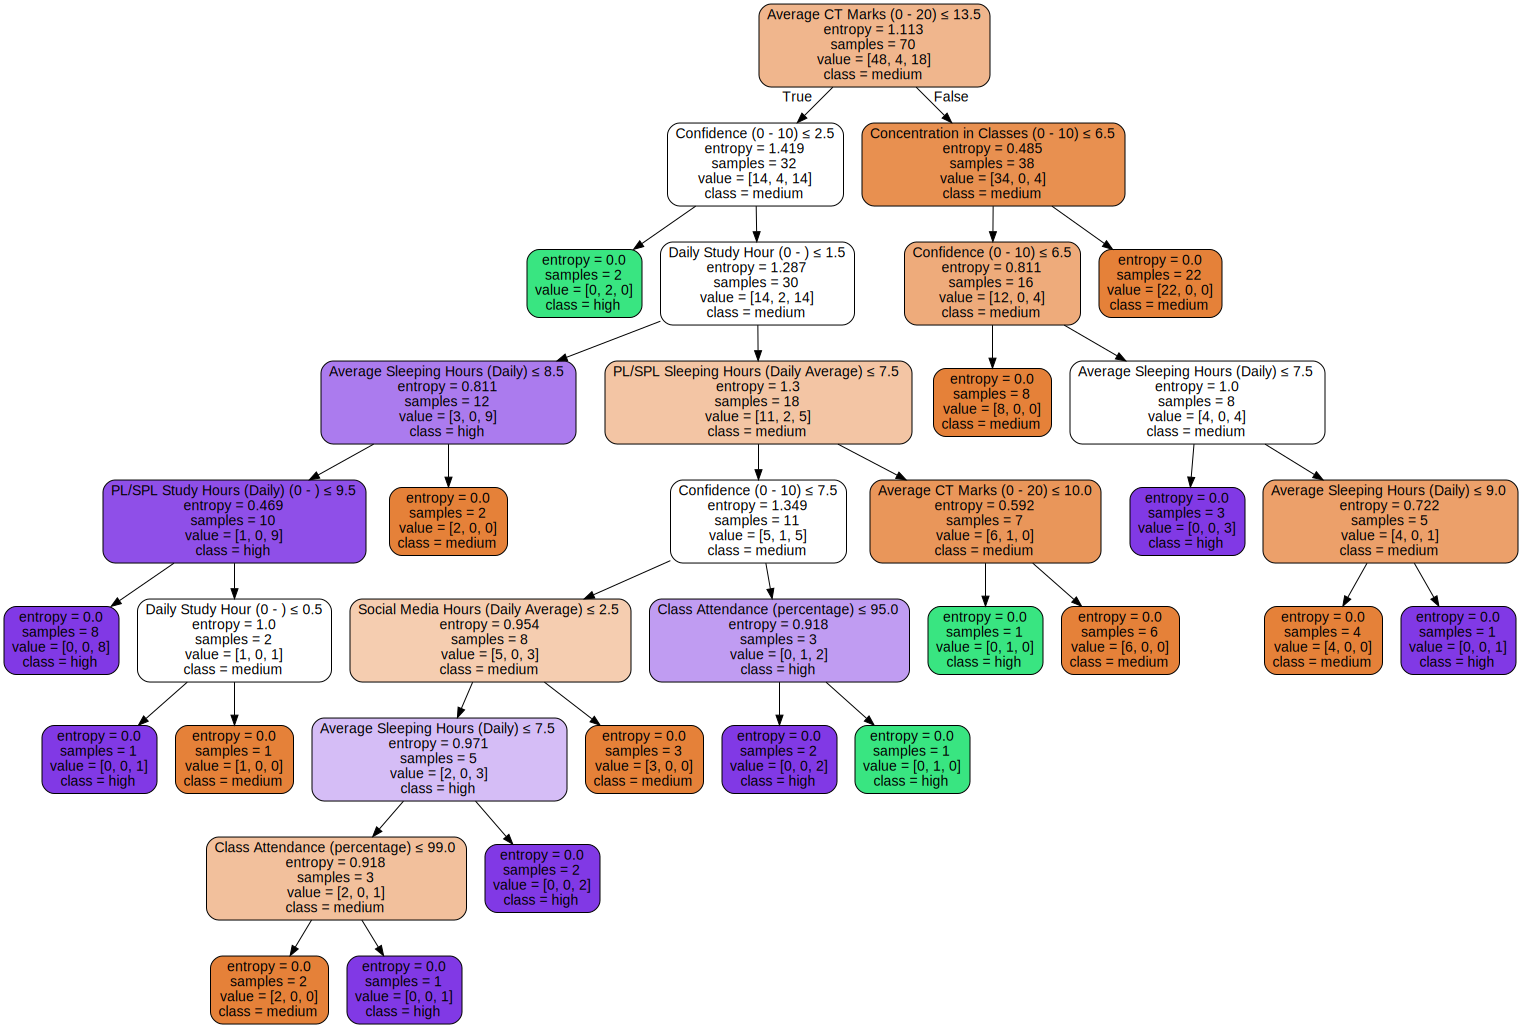

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=col[:10],  
                      class_names=df.target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

**New Section**
# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:4,:]

array([[-0.70572975,  0.72647377,  0.54990865,  1.18000215, -1.56698116,
         0.27524218,  0.29113859, -0.64775028,  0.43798113,  0.30706207],
       [ 1.60994598,  0.72647377,  0.23125298, -0.32181877, -0.72966298,
         0.27524218,  0.82744653,  0.86366703,  1.85299708, -0.58853564],
       [ 0.06616216,  0.72647377,  0.23125298,  0.42909169,  0.94497337,
         0.27524218, -1.31778522, -0.64775028, -0.50536284,  0.75486093],
       [ 0.06616216, -0.07436346,  0.86856433, -0.32181877,  0.94497337,
        -0.66460917,  0.82744653,  2.37508434, -0.03369086,  1.65045865]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
#Accuray of the model 
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7222222222222222
[[9 0 1]
 [0 0 1]
 [3 0 4]]


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.16666666666666666
0.3333333333333333
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.4444444444444444
0.2222222222222222
0.3333333333333333
0.2777777777777778
0.3333333333333333
0.2777777777777778
0.2222222222222222
0.2222222222222222
0.2777777777777778
0.3333333333333333
0.2777777777777778
0.3333333333333333
0.3333333333333333
0.3888888888888889
0.3888888888888889
0.3888888888888889
0.4444444444444444
0.3888888888888889
0.4444444444444444
0.3888888888888889
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444


Text(0, 0.5, 'Mean Error')

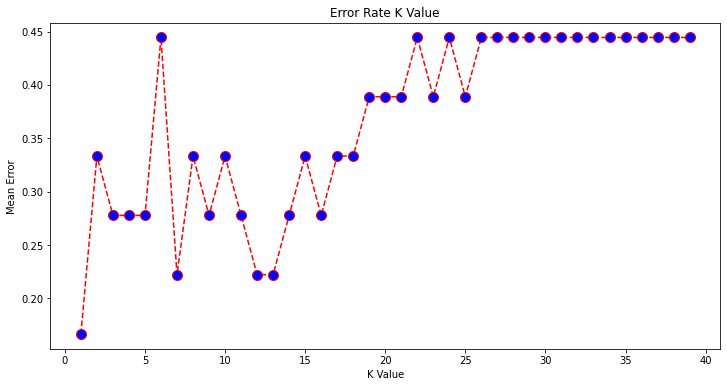

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')